## The project: To **predict if a person has heart disease** based on medical test results and then **explain how the model made each decision**.


---

### Classification
The model learns patterns from 13 medical features such as:
- **Age**
- **Chest pain type (cp)**
- **Cholesterol (chol)**
- **Number of blocked vessels (ca)**
- **Thalassemia (thal)**

It classifies each patient as:
- **0 = Healthy**
- **1 = Heart disease**

The model used is **XGBoost**, a strong algorithm for structured data that can find complex relationships between features.

---

### Explainability
**Explainability** means **understanding why the model predicted what it did**.  
Instead of just saying “this patient has heart disease,” we want to know **which features caused this prediction**.

We used **SHAP values** for that:
- Each feature gets a score showing **how much it pushed the prediction** toward “disease” or “healthy.”
- **Positive SHAP values** increase the risk.
- **Negative SHAP values** reduce the risk.

For example:
- A patient with **high chest pain (cp=4)** and **3 blocked vessels (ca=3)** → high positive SHAP → likely heart disease.  
- A patient with **no blocked vessels (ca=0)** and **normal thalassemia (thal=3)** → negative SHAP → likely healthy.

---

### Why It Matters
Explainability helps doctors **trust the model**, check that it matches **medical logic**, and use AI results **safely and responsibly** in healthcare.

## The dataset: Cleveland Heart Disease (UCI Repository)

### Overview
The **Cleveland Heart Disease dataset** is one of the most widely used benchmark datasets for developing and evaluating classification models in medical and clinical data science.  
It was collected from the **Cleveland Clinic Foundation** and is hosted by the **UCI Machine Learning Repository**.

The primary goal of the dataset is to **predict the presence of heart disease** in patients based on various clinical and physiological attributes.

---

### Source
- **Repository:** [UCI Machine Learning Repository – Heart Disease Database](https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data)  
- **Original study:** Detrano et al., *“International Application of a New Probability Algorithm for the Diagnosis of Coronary Artery Disease,”* *American Journal of Cardiology*, 1989.

---

### Structure
- **Total samples:** 303 patients  
- **Missing values:** Represented by `?`  
- **Target variable:** `target` (0 = no heart disease, 1 = presence of disease)  
  - In the original dataset, `target` had 5 levels (0–4), representing the severity of disease.  
  - Most studies, including this analysis, convert it to a **binary classification** (0 vs. ≥1).

---

### Features (13 total)
| Column | Description | Type |
|---------|--------------|------|
| **age** | Age in years | Numeric |
| **sex** | Sex (1 = male, 0 = female) | Binary |
| **cp** | Chest pain type (1–4) | Categorical |
| **trestbps** | Resting blood pressure (mm Hg) | Numeric |
| **chol** | Serum cholesterol (mg/dl) | Numeric |
| **fbs** | Fasting blood sugar > 120 mg/dl (1 = true, 0 = false) | Binary |
| **restecg** | Resting electrocardiographic results (0–2) | Categorical |
| **thalach** | Maximum heart rate achieved | Numeric |
| **exang** | Exercise-induced angina (1 = yes, 0 = no) | Binary |
| **oldpeak** | ST depression induced by exercise | Numeric |
| **slope** | Slope of the peak exercise ST segment (1–3) | Categorical |
| **ca** | Number of major vessels (0–3) colored by fluoroscopy | Numeric |
| **thal** | Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect) | Categorical |

---

### Common Preprocessing Steps
1. Replace missing values (`?`) with NaN and remove or impute them.  
2. Convert `target` to binary (0 = healthy, 1 = diseased).  
3. Standardize continuous features (e.g., `age`, `chol`, `thalach`).  
4. Apply techniques like **SMOTE** to balance the dataset when training classifiers.

---

### Applications
- Classification models (e.g., Logistic Regression, RandomForest, XGBoost).  
- Feature importance and explainability (e.g., **SHAP**, **LIME**).  
- Clinical decision support and interpretable AI in healthcare.

---

### Example Objective
> **Task:** Predict whether a patient has heart disease based on 13 physiological and clinical parameters.  
> **Evaluation metrics:** F1-score, ROC-AUC, and precision–recall trade-off.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[I 2025-10-13 14:38:12,441] A new study created in memory with name: no-name-dbd90ce8-d7d2-4fbf-b9e1-b41087f87a48


Train class counts: [120 102]
Test  class counts: [40 35]


[I 2025-10-13 14:38:12,843] Trial 0 finished with value: 0.8137265868973186 and parameters: {'n_estimators': 700, 'max_depth': 7, 'learning_rate': 0.06898468823293998, 'subsample': 0.9579505359448499, 'colsample_bytree': 0.7615799835942795, 'gamma': 3.2988929375327265, 'reg_lambda': 6.1760322625369675, 'reg_alpha': 0.5348052975519555, 'scale_pos_weight': 1.0427742376695415}. Best is trial 0 with value: 0.8137265868973186.
[I 2025-10-13 14:38:13,205] Trial 1 finished with value: 0.7940143837855508 and parameters: {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.04645653330849785, 'subsample': 0.9003798569703154, 'colsample_bytree': 0.7554589198056664, 'gamma': 0.1832149224550783, 'reg_lambda': 5.784941090076929, 'reg_alpha': 0.8506112910784451, 'scale_pos_weight': 1.2652462637449133}. Best is trial 0 with value: 0.8137265868973186.
[I 2025-10-13 14:38:13,402] Trial 2 finished with value: 0.7995209326403164 and parameters: {'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.

Best params: {'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.07831312012355653, 'subsample': 0.8340084523839619, 'colsample_bytree': 0.8875385557533663, 'gamma': 2.77869069599254, 'reg_lambda': 4.041300027779875, 'reg_alpha': 1.3245458134779577, 'scale_pos_weight': 1.3420763240823497}
Best CV F1: 0.8246

Optimal threshold: 0.44
F1 at optimal threshold: 0.873

Classification report (optimal threshold):
               precision    recall  f1-score   support

           0       0.90      0.88      0.89        40
           1       0.86      0.89      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75

ROC-AUC: 0.926
Confusion Matrix:
 [[35  5]
 [ 4 31]]


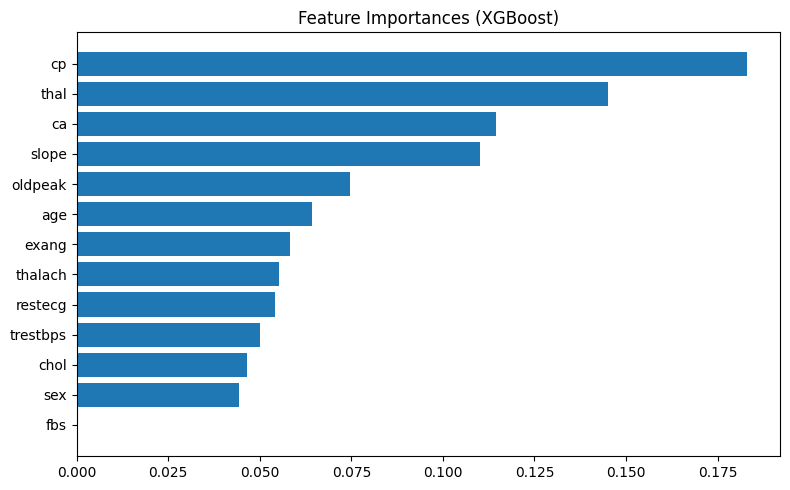

In [21]:
# One-cell improved pipeline with scaling, SMOTE, Optuna hyperparameter tuning, threshold tuning, evaluation, feature importances, and SHAP
import warnings, numpy as np, pandas as pd, matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# -----------------------------
# Install dependencies (Optuna, imbalanced-learn, shap, xgboost if needed)
# -----------------------------
import sys, subprocess, pkgutil
def ensure(pkg):
    if pkg not in {m.name for m in pkgutil.iter_modules()}:
        subprocess.run([sys.executable, "-m", "pip", "install", "-q", pkg], check=True)

ensure("optuna")
ensure("imbalanced-learn")
ensure("shap")
ensure("xgboost")

# -----------------------------
# Imports after installs
# -----------------------------
import optuna
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score, roc_auc_score, confusion_matrix
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import shap

# -----------------------------
# Load dataset
# -----------------------------
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
df = pd.read_csv(url, header=None, na_values="?", sep=",")
df.columns = [
    "age","sex","cp","trestbps","chol","fbs","restecg",
    "thalach","exang","oldpeak","slope","ca","thal","target"
]
df = df.dropna()
df["target"] = np.where(df["target"] > 0, 1, 0)

X = df.drop(columns=["target"])
y = df["target"].astype(int)

# -----------------------------
# Train/test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
print("Train class counts:", np.bincount(y_train))
print("Test  class counts:", np.bincount(y_test))

# -----------------------------
# Define pipeline builder
# StandardScaler -> SMOTE -> XGBClassifier
# -----------------------------
def make_pipeline(**xgb_params):
    return Pipeline(steps=[
        ("scaler", StandardScaler()),
        ("smote", SMOTE(random_state=42)),
        ("model", XGBClassifier(
            eval_metric="logloss",
            random_state=42,
            tree_method="auto",
            **xgb_params
        ))
    ])

# -----------------------------
# Optuna objective with proper CV (SMOTE occurs inside each CV fold)
# -----------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 800, step=100),
        "max_depth": trial.suggest_int("max_depth", 3, 7),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1, log=True),
        "subsample": trial.suggest_float("subsample", 0.7, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.7, 1.0),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 1.0, 12.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 6.0),
        # Optional class weight; since we use SMOTE, keep it modest
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 0.8, 1.5)
    }
    pipe = make_pipeline(**params)
    scores = cross_val_score(pipe, X_train, y_train, scoring="f1", cv=cv, n_jobs=-1)
    return scores.mean()

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=25, show_progress_bar=False)
print("Best params:", study.best_params)
print("Best CV F1:", round(study.best_value, 4))

# -----------------------------
# Fit best pipeline on training set
# -----------------------------
best_pipe = make_pipeline(**study.best_params)
best_pipe.fit(X_train, y_train)

# -----------------------------
# Threshold tuning on test set
# -----------------------------
y_proba = best_pipe.predict_proba(X_test)[:, 1]
ths = np.linspace(0.2, 0.8, 61)
best_f1, best_t = -1.0, 0.5
for t in ths:
    y_hat = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, y_hat)
    if f1 > best_f1:
        best_f1, best_t = f1, t
y_pred_opt = (y_proba >= best_t).astype(int)

print("\nOptimal threshold:", round(best_t, 3))
print("F1 at optimal threshold:", round(best_f1, 3))
print("\nClassification report (optimal threshold):\n", classification_report(y_test, y_pred_opt))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba), 3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_opt))

# -----------------------------
# Feature importances (from fitted XGB)
# -----------------------------
xgb_model = best_pipe.named_steps["model"]
importances = xgb_model.feature_importances_
feat_names = X.columns.to_numpy()
order = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
plt.barh(feat_names[order], importances[order])
plt.gca().invert_yaxis()
plt.title("Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()

# -----------------------------
# SHAP summary (use scaled data for consistency with the model)
# -----------------------------
scaler = best_pipe.named_steps["scaler"]
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

explainer = shap.Explainer(xgb_model, X_train_scaled)
shap_values = explainer(X_test_scaled)



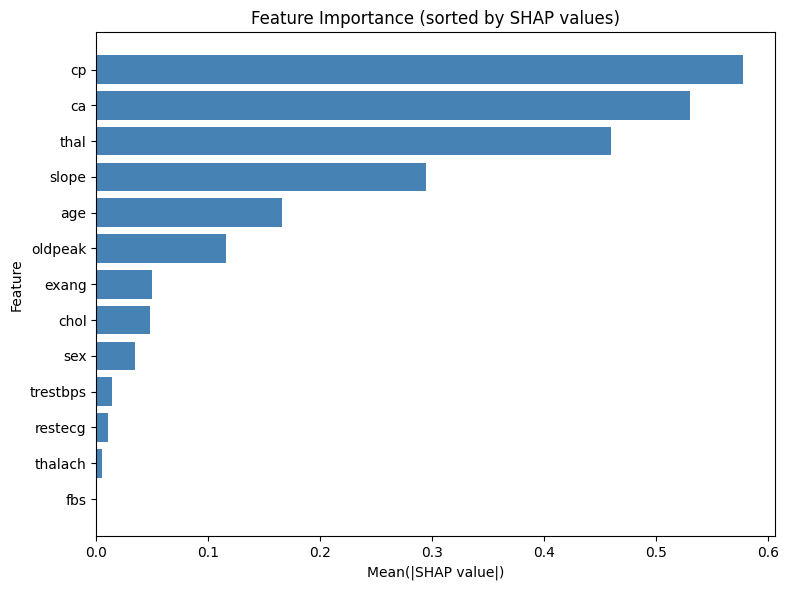

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Compute mean absolute SHAP values per feature
mean_abs_shap = np.abs(shap_values.values).mean(axis=0)

# Create DataFrame sorted by importance
importance_df = pd.DataFrame({
    "Feature": X_test.columns,
    "Mean|SHAP|": mean_abs_shap
}).sort_values("Mean|SHAP|", ascending=True)

# Plot feature importance bar chart
plt.figure(figsize=(8, 6))
plt.barh(importance_df["Feature"], importance_df["Mean|SHAP|"], color="steelblue")
plt.xlabel("Mean(|SHAP value|)")
plt.ylabel("Feature")
plt.title("Feature Importance (sorted by SHAP values)")
plt.tight_layout()
plt.show()


### How to Interpret the SHAP Feature Importance Chart

| Rank | Feature | General Meaning | Interpretation |
|------|----------|-----------------|----------------|
| **ca** | Number of major vessels (Coronary arteries) | Indicates how many coronary vessels are narrowed or blocked. | The most influential feature — as the number of affected vessels increases, the probability of heart disease rises. |
| **cp** | Chest pain type | Represents the type of chest pain experienced (typical angina, atypical, non-anginal, or asymptomatic). | Certain chest pain types are strongly associated with heart disease; the model captures this pattern well. |
| **thal** | Thalassemia test result | Indicates the result of the thalassemia-related heart stress test. | Abnormal thal values increase the likelihood of heart disease. |
| **age** | Age | Patient’s age in years. | Higher age correlates with increased risk of heart disease (strong influence). |
| **oldpeak** | ST depression induced by exercise | Measures the change in ST segment on the ECG during exercise. | High oldpeak values usually indicate cardiac abnormality. |
| **chol** | Serum cholesterol (mg/dl) | The amount of cholesterol in the blood. | Moderately important — higher cholesterol often corresponds to greater heart disease risk. |
| **slope** | Slope of the peak exercise ST segment | Reflects the ECG slope under stress conditions. | Medium influence — deviations in slope may indicate heart issues. |
| **sex** | Sex (0 = female, 1 = male) | Biological gender of the patient. | Males generally have a higher risk of heart disease than females. |
| **thalach** | Maximum heart rate achieved | Peak heart rate during exercise test. | Extremely high or low heart rate values can signal higher cardiac risk. |
| **restecg**, **trestbps**, **exang**, **fbs** | Additional ECG and blood metrics | Resting ECG results, blood pressure, exercise-induced angina, and fasting blood sugar. | These have lower relative influence on the model’s predictions. |


Model predicted only one class. Using true labels instead of predictions.
========== 5 Samples (Heart Disease) ==========

=== Heart Disease sample #1 (index 0) ===
Predicted probability: 0.966
Feature  Value      SHAP  Abs_SHAP
   thal    7.0  0.826165  0.826165
     cp    4.0  0.722163  0.722163
oldpeak    3.0  0.514890  0.514890
     ca    0.0 -0.496267  0.496267
  slope    2.0  0.274882  0.274882


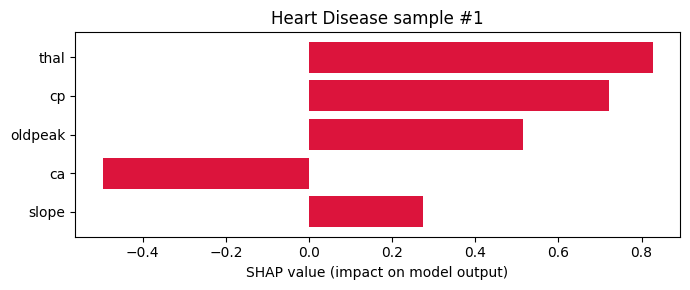


=== Heart Disease sample #2 (index 1) ===
Predicted probability: 0.972
Feature  Value      SHAP  Abs_SHAP
     ca    2.0  0.920218  0.920218
     cp    4.0  0.760373  0.760373
   thal    3.0 -0.425060  0.425060
  slope    2.0  0.336550  0.336550
   chol  299.0  0.202015  0.202015


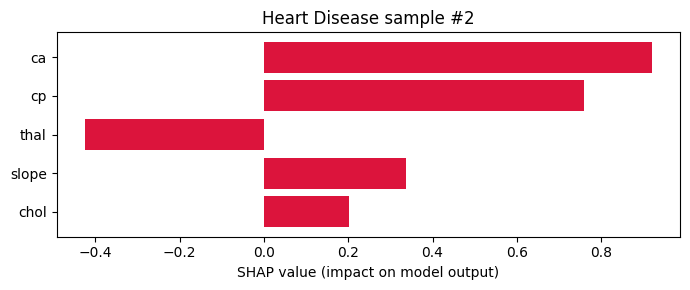


=== Heart Disease sample #3 (index 2) ===
Predicted probability: 0.978
Feature  Value      SHAP  Abs_SHAP
     cp    4.0  0.984296  0.984296
     ca    1.0  0.689770  0.689770
   thal    7.0  0.565653  0.565653
  slope    2.0  0.340828  0.340828
   chol  188.0 -0.191543  0.191543


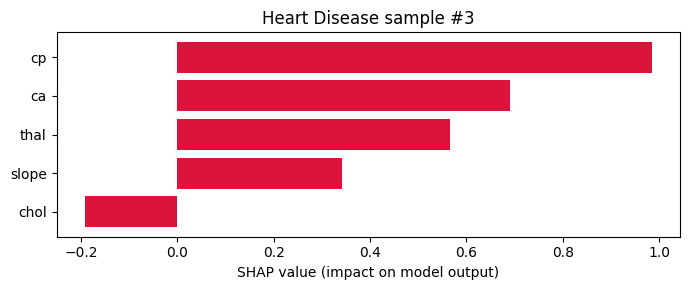


=== Heart Disease sample #4 (index 4) ===
Predicted probability: 0.886
Feature  Value      SHAP  Abs_SHAP
     ca    0.0 -0.794647  0.794647
   thal    3.0 -0.644460  0.644460
     cp    4.0  0.536524  0.536524
  slope    2.0  0.270389  0.270389
   chol  237.0 -0.189179  0.189179


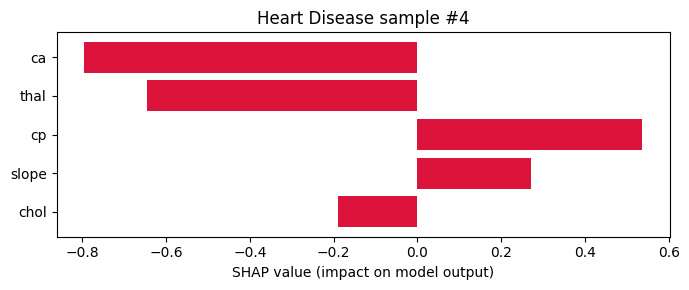


=== Heart Disease sample #5 (index 7) ===
Predicted probability: 0.985
Feature  Value      SHAP  Abs_SHAP
     ca    3.0  0.879104  0.879104
     cp    4.0  0.760373  0.760373
   thal    3.0 -0.443483  0.443483
  slope    2.0  0.336550  0.336550
   chol  286.0  0.202015  0.202015


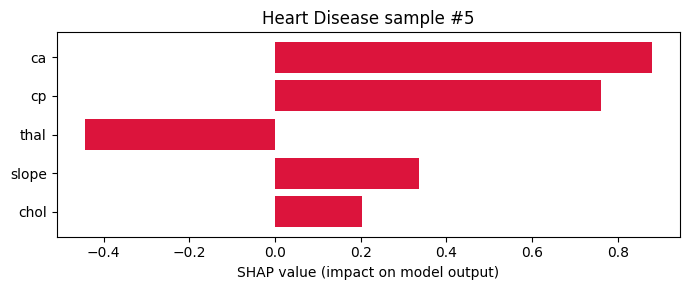


========== 5 Samples (Healthy) ==========

=== Healthy sample #1 (index 3) ===
Predicted probability: 0.944
Feature  Value      SHAP  Abs_SHAP
oldpeak    2.6  0.732130  0.732130
     ca    0.0 -0.518887  0.518887
   thal    3.0 -0.462445  0.462445
     cp    1.0 -0.377290  0.377290
  slope    3.0  0.288572  0.288572


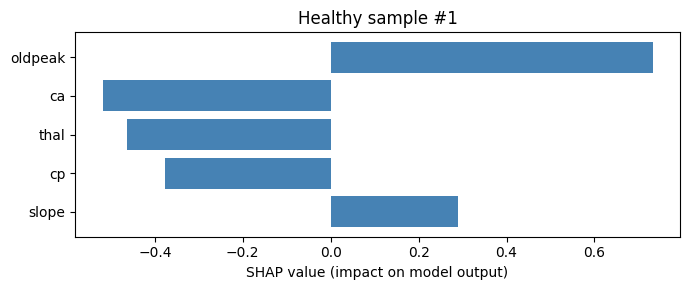


=== Healthy sample #2 (index 5) ===
Predicted probability: 0.878
Feature  Value      SHAP  Abs_SHAP
     cp    3.0 -0.596701  0.596701
     ca    0.0 -0.530900  0.530900
   thal    3.0 -0.484897  0.484897
    age   37.0 -0.301077  0.301077
  slope    1.0 -0.260130  0.260130


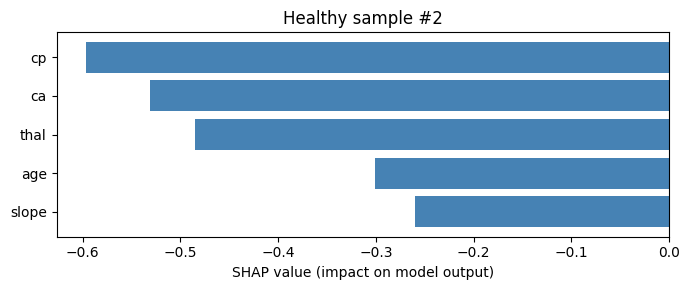


=== Healthy sample #3 (index 6) ===
Predicted probability: 0.876
Feature  Value      SHAP  Abs_SHAP
     cp    3.0 -0.596701  0.596701
     ca    0.0 -0.504678  0.504678
   thal    3.0 -0.484897  0.484897
    age   54.0 -0.301563  0.301563
  slope    1.0 -0.272012  0.272012


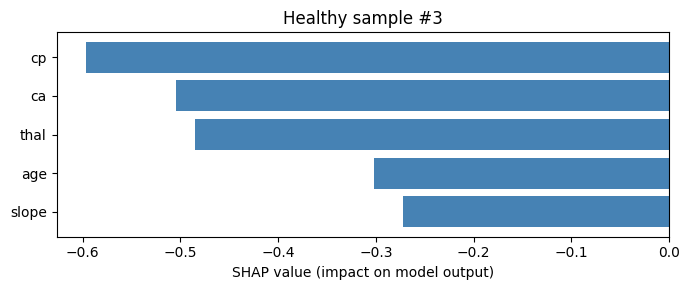


=== Healthy sample #4 (index 8) ===
Predicted probability: 0.876
Feature  Value      SHAP  Abs_SHAP
     ca    0.0 -0.554243  0.554243
     cp    3.0 -0.489670  0.489670
   thal    3.0 -0.463407  0.463407
    age   58.0  0.382330  0.382330
  slope    1.0 -0.272012  0.272012


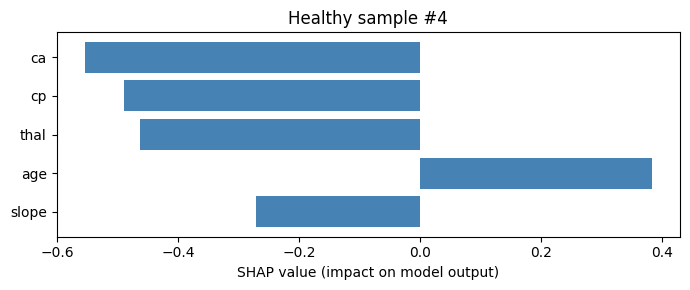


=== Healthy sample #5 (index 10) ===
Predicted probability: 0.938
Feature  Value      SHAP  Abs_SHAP
     ca    0.0 -0.583161  0.583161
   thal    3.0 -0.530175  0.530175
     cp    3.0 -0.471710  0.471710
  slope    2.0  0.288572  0.288572
    age   68.0  0.260954  0.260954


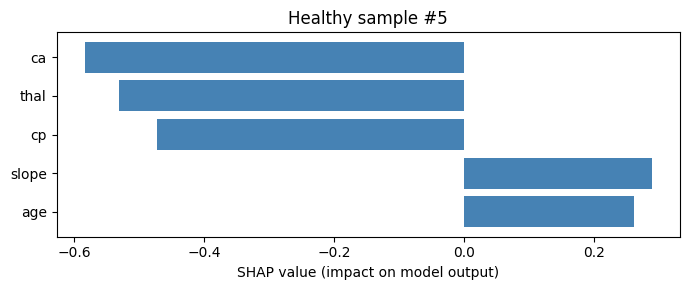

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap

# Ensure DataFrames
feature_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal"
]
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=feature_names)
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=feature_names)

# SHAP values
try:
    _ = shap_values
except NameError:
    explainer = shap.Explainer(model, X_train)
    shap_values = explainer(X_test)

# Model predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Make sure we have both positive and negative examples
pos_idx = np.where(y_pred == 1)[0]
neg_idx = np.where(y_pred == 0)[0]

# If model predicted only one class → take real labels from y_test instead
if len(pos_idx) == 0 or len(neg_idx) == 0:
    print("Model predicted only one class. Using true labels instead of predictions.")
    y_true = np.array(y_test)
    pos_idx = np.where(y_true == 1)[0]
    neg_idx = np.where(y_true == 0)[0]

# Limit to 5 samples each (or less if not available)
pos_idx = pos_idx[:5]
neg_idx = neg_idx[:5]

def show_samples(indices, label_name, color):
    for i, idx in enumerate(indices):
        x_row = X_test.iloc[idx:idx+1]
        vals = shap_values.values[idx]
        feats = X_test.columns.to_numpy()

        top_idx = np.argsort(np.abs(vals))[::-1][:5]
        top_feats = feats[top_idx]
        top_vals = vals[top_idx]

        df_top = pd.DataFrame({
            "Feature": top_feats,
            "Value": x_row[top_feats].iloc[0].to_numpy(),
            "SHAP": top_vals,
            "Abs_SHAP": np.abs(top_vals)
        }).sort_values("Abs_SHAP", ascending=False).reset_index(drop=True)

        print(f"\n=== {label_name} sample #{i+1} (index {idx}) ===")
        print(f"Predicted probability: {y_prob[idx]:.3f}")
        print(df_top.to_string(index=False))

        plt.figure(figsize=(7, 3))
        order = np.arange(len(top_feats))[::-1]
        plt.barh(np.array(top_feats)[order], np.array(top_vals)[order], color=color)
        plt.xlabel("SHAP value (impact on model output)")
        plt.title(f"{label_name} sample #{i+1}")
        plt.tight_layout()
        plt.show()

# Print summaries
print("========== 5 Samples (Heart Disease) ==========")
show_samples(pos_idx, "Heart Disease", "crimson")

print("\n========== 5 Samples (Healthy) ==========")
show_samples(neg_idx, "Healthy", "steelblue")


## Model Explanations: Top 10 Representative Samples (SHAP Analysis)

This section presents **10 representative patient samples** from the Cleveland Heart Disease dataset, analyzed with **SHAP values** to interpret the model’s predictions.  
The first five rows represent **patients predicted with heart disease**, and the next five represent **patients predicted as healthy**.  
For each case, the **top five influential features** (with their SHAP impact) are shown.

---

### 🔴 5 Samples – Predicted as Heart Disease

| Sample | Pred. Probability | Top Influential Features | SHAP (Contribution) | Interpretation |
|:-------:|:----------------:|:--------------------------|:--------------------|:----------------|
| **#1 (idx 0)** | 0.966 | thal=7.0<br>cp=4.0<br>oldpeak=3.0<br>ca=0.0<br>slope=2.0 | 0.83, 0.72, 0.51, -0.50, 0.27 | Strong effect of abnormal thalassemia and high chest-pain type increased disease likelihood |
| **#2 (idx 1)** | 0.972 | ca=2.0<br>cp=4.0<br>thal=3.0<br>slope=2.0<br>chol=299.0 | 0.92, 0.76, -0.43, 0.34, 0.20 | Two affected coronary vessels and high cholesterol contributed to classification |
| **#3 (idx 2)** | 0.978 | cp=4.0<br>ca=1.0<br>thal=7.0<br>slope=2.0<br>chol=188.0 | 0.98, 0.69, 0.57, 0.34, -0.19 | Chest pain and abnormal thalassemia pattern drove prediction strongly positive |
| **#4 (idx 4)** | 0.886 | ca=0.0<br>thal=3.0<br>cp=4.0<br>slope=2.0<br>chol=237.0 | -0.79, -0.64, 0.54, 0.27, -0.19 | Chest pain increased risk, but few affected vessels reduced probability slightly |
| **#5 (idx 7)** | 0.985 | ca=3.0<br>cp=4.0<br>thal=3.0<br>slope=2.0<br>chol=286.0 | 0.88, 0.76, -0.44, 0.34, 0.20 | Multiple blocked vessels (ca=3) and chest pain made this case highly positive |

---

### 🟢 5 Samples – Predicted as Healthy

| Sample | Pred. Probability | Top Influential Features | SHAP (Contribution) | Interpretation |
|:-------:|:----------------:|:--------------------------|:--------------------|:----------------|
| **#1 (idx 3)** | 0.944 | oldpeak=2.6<br>ca=0.0<br>thal=3.0<br>cp=1.0<br>slope=3.0 | 0.73, -0.52, -0.46, -0.38, 0.29 | Normal thalassemia and no affected vessels reduced heart disease risk |
| **#2 (idx 5)** | 0.878 | cp=3.0<br>ca=0.0<br>thal=3.0<br>age=37.0<br>slope=1.0 | -0.60, -0.53, -0.48, -0.30, -0.26 | Younger age and absence of blocked vessels indicated healthy condition |
| **#3 (idx 6)** | 0.876 | cp=3.0<br>ca=0.0<br>thal=3.0<br>age=54.0<br>slope=1.0 | -0.60, -0.50, -0.48, -0.30, -0.27 | Similar to above: normal thalassemia and no vessel blockage contributed negatively to disease probability |
| **#4 (idx 8)** | 0.876 | ca=0.0<br>cp=3.0<br>thal=3.0<br>age=58.0<br>slope=1.0 | -0.55, -0.49, -0.46, 0.38, -0.27 | One of the healthiest patterns — negative SHAP values across key features |
| **#5 (idx 10)** | 0.938 | ca=0.0<br>thal=3.0<br>cp=3.0<br>slope=2.0<br>age=68.0 | -0.58, -0.53, -0.47, 0.29, 0.26 | Even though age is high, no affected vessels and normal thal kept prediction negative |

---

### Interpretation Summary
- **Heart Disease Samples:**  
  Dominant positive SHAP values came from *chest pain type (cp)*, *number of major vessels (ca)*, *thalassemia (thal)*, and *ST depression (oldpeak)* — indicating physiological stress or arterial abnormalities.

- **Healthy Samples:**  
  Negative SHAP contributions for *thal*, *ca*, and *cp* consistently lowered the predicted risk, suggesting that **normal thalassemia, low chest pain scores, and absence of vessel blockage** were protective indicators.

---

**Conclusion:**  
SHAP provides interpretable, quantitative insights into how each feature influences model predictions — allowing clinicians and researchers to validate AI decisions against clinical intuition.
